In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [23]:
df=pd.read_csv('heart.csv',delimiter=',')

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
df.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [26]:
df.size

4242

In [27]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [30]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


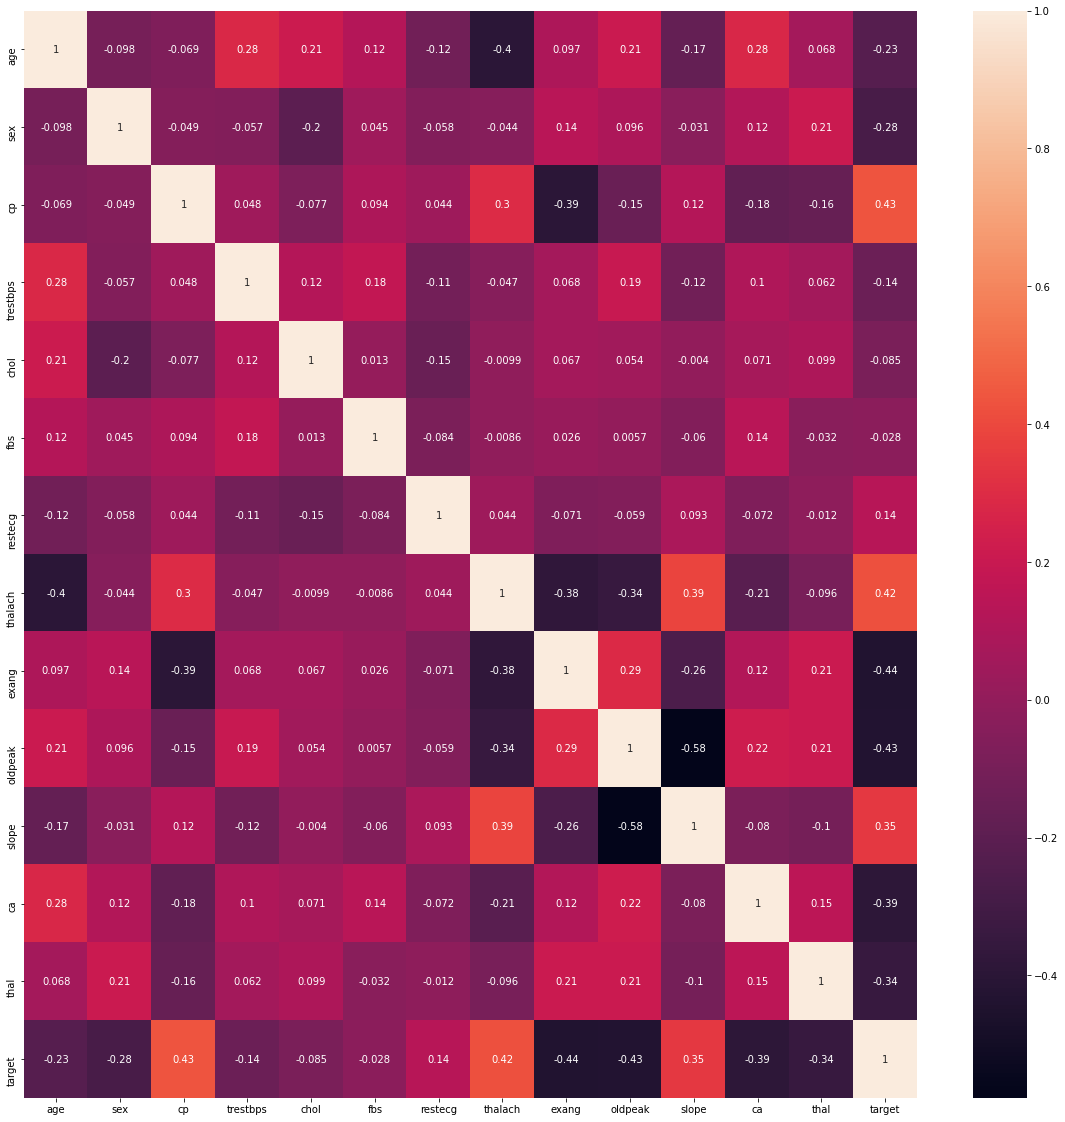

In [31]:
import seaborn as sns
corr=df.corr()
features=corr.index

plt.figure(figsize=(20,20))
sns.heatmap(df[features].corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9d79216d0>,
      dtype=object)

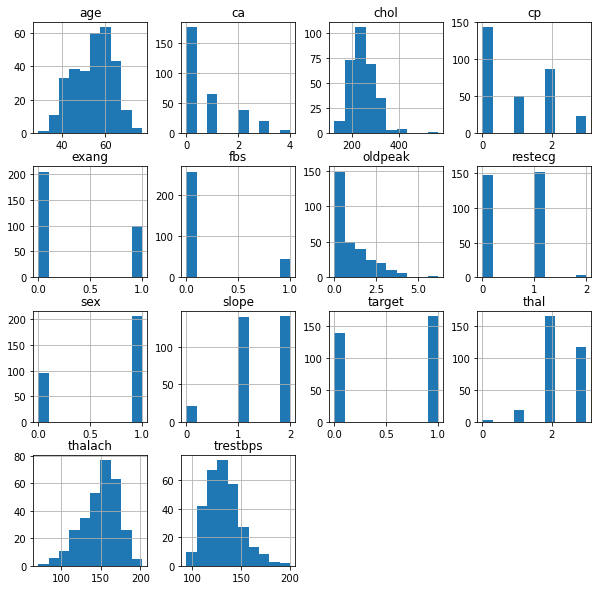

In [32]:
df.hist(figsize=(10,10))

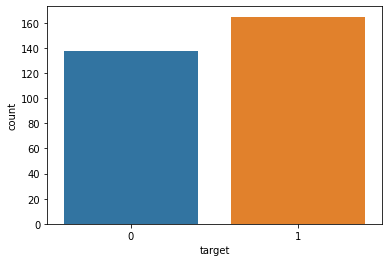

In [33]:

sns.countplot(x='target',data=df)

In [34]:
dataset=pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

standard_scaler=StandardScaler()

column_scale=['age','trestbps','chol','thalach','oldpeak']
dataset[column_scale]=standard_scaler.fit_transform(dataset[column_scale])

In [36]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [37]:
y=dataset['target']
x=dataset.drop(['target'],axis=1)

In [41]:
from sklearn.model_selection import cross_val_score
knn_score=[]
for i in range(1,21):
    knn_classification=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn_classification,x,y,cv=10)
    knn_score.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

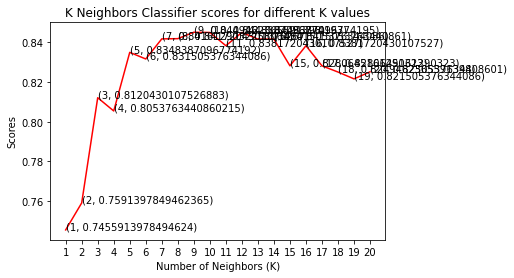

In [44]:
plt.plot([k for k in range(1, 21)], knn_score, color = 'red')
for i in range(1,21):
    plt.text(i, knn_score[i-1], (i, knn_score[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [46]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,x,y,cv=10)

In [47]:
score.mean()

0.8448387096774195

In [58]:
print("Accuracy of the heart disease Through KNN is  : {}%".format(score.mean()*100))

Accuracy of the heart disease Through KNN is  : 80.20430107526883%


# Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
random_classifier=RandomForestClassifier(n_estimators=10)
score=cross_val_score(random_classifier,x,y,cv=10)

In [59]:
print("Accuracy of the Heart Disease through RandomForestClassifier is {} %".format(score.mean()*100))

Accuracy of the Heart Disease through RandomForestClassifier is 80.20430107526883 %


# Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(random_state=0)
score=cross_val_score(clf,x,y,cv=10)

In [67]:
print("Accuracy of the Heart Disease through DecisionTreeClassifier is {} %".format(score.mean()*100))

Accuracy of the Heart Disease through DecisionTreeClassifier is 75.52688172043011 %
